In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from PIL import Image
import urllib
import matplotlib.font_manager as font_manager
import json

# Import any font you want from your pc

In [2]:
# Create a font properties object with the font file

font_path_regular = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'
font_normal = font_manager.FontProperties(fname=font_path_regular)

font_path_med = "/Users/alfonsomarino/Desktop/Teko/static/Teko-Medium.ttf"
font_med = font_manager.FontProperties(fname = font_path_med)

font_path_semi = "/Users/alfonsomarino/Desktop/Teko/static/Teko-SemiBold.ttf"
font_semi = font_manager.FontProperties(fname = font_path_semi)

# Import file

In [4]:
df = pd.read_excel("/Users/alfonsomarino/Desktop/soccerment_players.xls")

In [5]:
df.columns

Index(['Full Name', 'Team', 'League', 'Season', 'Age', 'Position', 'Role',
       'Jersey Number', 'Spr', 'Appearences', 'Time Played', 'Goals',
       'Goals P90', 'Expected Goals (xG)', 'xG P90', 'Non-penalty xG',
       'Non-penalty xG p90', 'xGoT', 'xGoTA', 'SGA', 'Shots',
       'Shots_on target', 'Shot touch %', 'Goals prevented per xGoT',
       'Assists', 'Assists p90', 'Expected Assists (xA)',
       'Expected Assists Received', 'xA p90', 'Open-play xA', 'OpxA p90',
       'xOVA', 'xOVA p90', 'Expected Threat (xT)', 'xT p90', 'xT from passes',
       'xT from passes p90', 'xT from carries', 'xT from carries p90',
       'Counterpressing Actions', 'One-twos opened', 'One-twos closed',
       'Through balls received', 'Prog. carries', 'Prog. passes',
       'Chances created', 'Through balls', 'Successful dribbles',
       'Total passes', 'Layoffs', 'Ball recoveries', 'Passes final 3rd',
       'Successful crosses', 'Interceptions', 'Aerials won', 'Defensive Aero',
       'Offens

In [6]:
df['diff'] = df['Expected Goals (xG)'] - df['Goals']

In [7]:
df_final = df.nlargest(15, "Expected Goals (xG)") #Top 15 xG

In [8]:
df_final = df_final.sort_values("Expected Goals (xG)", ascending = True) #sort values

In [9]:
df_final

,Full Name,Team,League,Season,Age,Position,Role,Jersey Number,Spr,Appearences,...,Fouls won,Fouls conceded,Yellow cards,Red cards,Saves made,Short pass acc,Long pass acc,Goals Prevented,Touches in Opp. Box,diff
363,Mario Pasalic,Atalanta,Serie A,2024,29,Midfielder,CM,8,46.702,18,...,4,12,1,0,0,91.656,67.241,0.0,44,3.655
445,Ange-Yoan Bonny,Parma,Serie A,2024,21,Forward,FW,13,44.756,20,...,27,15,2,0,0,76.768,64.286,0.0,79,1.957
46,Joel Pohjanpalo,Venezia,Serie A,2024,30,Forward,FW,20,44.829,18,...,15,11,0,0,0,61.794,45.833,0.0,66,1.482
274,Tammy Abraham,Milan,Serie A,2024,27,Forward,FW,90,38.824,14,...,5,12,0,0,0,74.286,0.000,0.0,48,4.984
124,Nikola Krstovic,Lecce,Serie A,2024,24,Forward,FW,9,50.192,20,...,28,27,2,0,0,68.690,41.667,0.0,81,1.481
220,Artem Dovbyk,Roma,Serie A,2024,27,Forward,FW,11,46.696,18,...,9,20,0,0,0,73.551,0.000,0.0,97,1.523
15,Romelu Lukaku,Napoli,Serie A,2024,31,Forward,FW,11,47.651,18,...,18,21,1,0,0,71.074,0.000,0.0,72,0.848
295,Lautaro Martínez,Internazionale,Serie A,2024,27,Forward,FW,10,46.093,17,...,25,22,0,0,0,75.618,71.429,0.0,79,1.132
373,Ademola Lookman,Atalanta,Serie A,2024,27,Forward,FW,11,50.893,17,...,13,19,2,0,0,80.324,41.667,0.0,109,-0.605
294,Marcus Thuram,Internazionale,Serie A,2024,27,Forward,FW,9,56.803,19,...,28,22,1,0,0,75.229,0.000,0.0,114,-3.511


# Visualization

In [10]:
colors = [
    'blanchedalmond',  #background colour
    '#ffdcc2',
    '#ffd1ae',
    '#ffc59a',
    '#ffb986',
    '#ffad72',
    '#ffa15e',
    '#ff954a',
    '#ff8936',
    '#ff7d22',
    '#ff710e',
    '#ff6500',
    '#f85800',
    '#f14b00',
    '#ea3e00',
    '#e23100',
    '#d92400',
    '#c71700',
    '#a31212',
    '#8B0000'   # darkred
]

soc_cm = LinearSegmentedColormap.from_list('SOC4', colors, N=50)
plt.colormaps.register(cmap=soc_cm)

/var/folders/1q/90p05g051_l43jfjx7s90z1h0000gn/T/ipykernel_1422/2952045984.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(-2, 15, 2), fontproperties=font_normal)


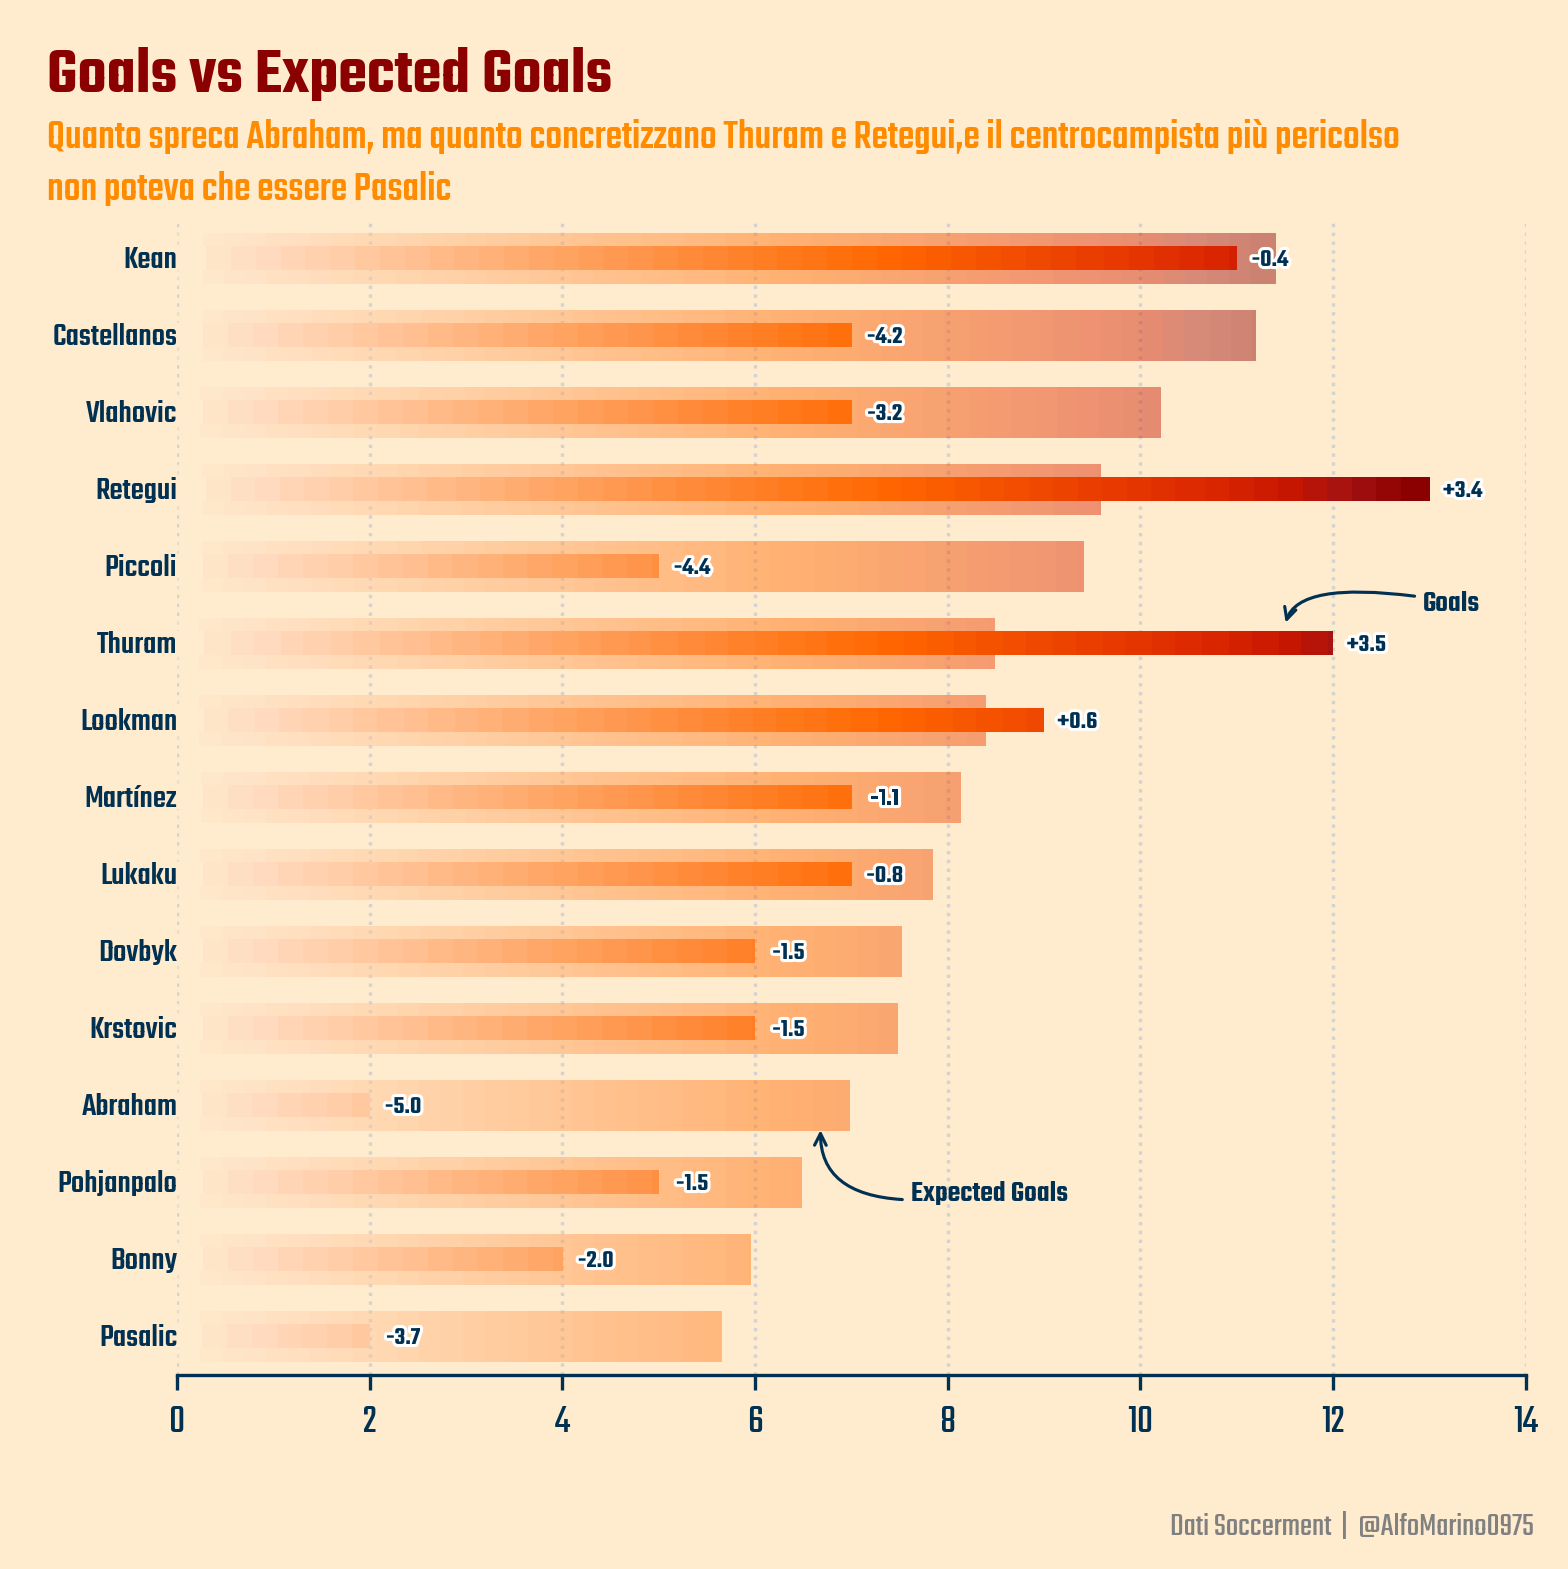

In [11]:
# Prima resettiamo l'indice
df_final = df_final.reset_index(drop=True)

fig = plt.figure(figsize=(5.8,5), dpi=300, facecolor = "blanchedalmond")
ax = plt.subplot(111)
ax.set_facecolor('blanchedalmond')
plt.gca().set_facecolor('blanchedalmond')

ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
#ax.xaxis.set_label_text('Expected Goals | Goals', size=10, fontproperties=font_med, color = "#003153")
ax.tick_params(labelsize=7, colors = "#003153")
ax.set_xticklabels(np.arange(-2, 15, 2), fontproperties=font_normal)
ax.grid(axis='x', color='lightgrey', ls=':')

# Expected Goals
bars_ = ax.barh(range(len(df_final)), df_final['Expected Goals (xG)'], height=0.65)
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(df_final['Expected Goals (xG)']),256))
    ax.imshow(
        grad, extent=[x,x+w,y,y+h], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='SOC4', alpha=0.45
    )

# Goals
bars_ = ax.barh(range(len(df_final)), df_final['Goals'], height=0.3)
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(df_final['Goals']),256))
    ax.imshow(
        grad, extent=[x,x+w,y,y+h], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='SOC4'
    )

ax.set_xlim(0,14)
ax.set_ylim(-.5,14.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color("#003153")

for i in range(len(df_final)):
    # Estraiamo il cognome (ultima parola del Full Name)
    cognome = df_final['Full Name'].iloc[i].split()[-1]
    
    ax.annotate(
        xy=(0, i),  # x più a sinistra per allineare i nomi
        text=cognome,
        size=8,
        c = "#003153",
        ha='right',    # allineamento a sinistra
        va='center',  # centrato verticalmente rispetto alla barra
        fontproperties=font_med
    )
    
    diff = df_final['Goals'].iloc[i] - df_final['Expected Goals (xG)'].iloc[i]
    text_sign = '+' if diff > 0 else ''
    text_ = ax.annotate(
        xy=(df_final['Goals'].iloc[i], i),
        xytext=(8,0),
        text=f'{text_sign}{diff:.1f}',
        size=6,
        c = "#003153",
        ha='center',
        va='center',
        textcoords='offset points',
        weight='bold',
        fontproperties=font_semi
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
    )
# Annotazioni per le legende
text_ = ax.annotate(
    xy=(11.5, 9),
    xytext=(40,10),
    text='Goals',
    c = "#003153",
    size=7,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    fontproperties=font_semi,
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="#003153", linewidth=0.75,
            connectionstyle="angle3,angleA=-10,angleB=100"
    )
)

text_ = ax.annotate(
    xy=(6.7, 2.95),
    xytext=(40,-20),
    text='Expected Goals',
    c = "#003153",
    size=7,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    fontproperties=font_semi,
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="#003153", linewidth=0.75,
            connectionstyle="angle3,angleA=10,angleB=-100"
    )
)

fig.text(0.8, 0.01, "Dati Soccerment  |  @AlfoMarino0975", fontproperties=font_normal, fontsize=8, ha='center', va='center', color = "grey")

# Titoli
fig_text(
    x = 0.05, y = .96, 
    s = "Goals vs Expected Goals",
    va = "bottom", ha = "left",
    fontsize = 16, font = font_semi, color = "darkred"
)
fig_text(
    x = 0.05, y = 0.89, 
    s = "Quanto spreca Abraham, ma quanto concretizzano Thuram e Retegui,e il centrocampista più pericolso\nnon poteva che essere Pasalic",
    va = "bottom", ha = "left",
    fontsize = 10, font = font_med, color = "darkorange"
)

plt.savefig('/Users/alfonsomarino/Desktop/barplotxg.png', dpi=300, bbox_inches='tight')


plt.show()